In [7]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

data = sio.loadmat('svm-poly-data.mat')

#cleaning up

X_col = data['X'][:,0]
n = X_col.size
A = np.reshape(X_col, (n,1))

X2_col = dat3['X'][:,1]
B = np.reshape(X2_col, (n,1))
y_col = data['y'][:,0]
C = np.reshape(y_col, (n,1))

data_clean = np.concatenate((A,B,C),axis=1)
pd.DataFrame(data_clean).head()

,0,1,2
0,-0.158986,0.423977,1.0
1,-0.347926,0.470760,1.0
2,-0.504608,0.353801,1.0
3,-0.596774,0.114035,1.0
4,-0.518433,-0.172515,1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.828125


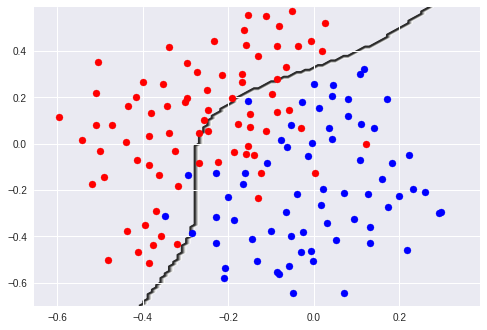

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_clean[:,0:2], 
                                                    data_clean[:,2], test_size=0.3,random_state=109)

# splitting positive / negative samples

pos = y_train[:] ==1
neg = y_train[:] ==0

posX1 = x_train[pos][:,0]
posX2 = x_train[pos][:,1]

negX1 = x_train[neg][:,0]
negX2 = x_train[neg][:,1]

plt.scatter(posX1, posX2, color = 'r')
plt.scatter(negX1, negX2, color = 'b')

# support vector machine with poly kernel and high C

clf = svm.SVC(C=1000, kernel='poly')
model = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# plot boundary

xx1, xx2 = np.meshgrid(np.arange(-0.6, 0.4, 0.01),
                       np.arange(-0.7, 0.6, 0.01))

xx1_flat, xx2_flat = (xx1.ravel(), xx2.ravel())
xx = np.column_stack((xx1_flat, xx2_flat))

zz = clf.predict(xx)
zz_plot = zz.reshape(130, 100)

plt.contour(xx1, xx2, zz_plot, zorder=0)
plt.show()